# 📝 Naive Bayes Text Classification

## 1. Project Overview
In this project we use the **20 Newsgroups dataset** (two categories: *sci.med* and *sci.space*).  
The goal is to classify text documents into the correct category using **Naive Bayes** with **TF-IDF** features.  

Steps:
1. Load the dataset  
2. Preprocess text (Bag of Words + TF-IDF)  
3. Train a Naive Bayes classifier  
4. Evaluate model performance (Accuracy, Precision, Recall, F1, Confusion Matrix)  



In [22]:

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt



## 2. Load Dataset
We load the 20 Newsgroups dataset and select two categories: **sci.med** and **sci.space**.  
This dataset contains ~2000 text documents, each labeled according to its topic.  


In [16]:
categories=["sci.med","sci.space"]
data=fetch_20newsgroups(subset="all",categories=categories,shuffle=True,random_state=42)
print("Number of documents:", len(data.data))
print("Categories:", data.target_names)
print("Example text:\n", data.data[0][:500])

Number of documents: 1977
Categories: ['sci.med', 'sci.space']
Example text:
 From: menon@boulder.Colorado.EDU (Ravi or Deantha Menon)
Subject: Re: Need info on Circumcision, medical cons and pros
Nntp-Posting-Host: beagle.colorado.edu
Organization: University of Colorado, Boulder
Lines: 29

texx@ossi.com ("Texx") writes:

>Scene: Navy boot camp

>DI:		"Son, you smel awful! Dont you ever clean that thing?"
>Recruit:	"No Sir !"
>DI:		"Why the hell NOT!"
>Recruit:	"Your not sposed to touch down there?"
>DI:		"Why ?"
>Recruit:	"Cause thats the eye of god down there, an' your


## 3. Text Preprocessing
Since computers do not understand words, we convert documents into numbers:  
- Bag of Words (word counts)  
- TF-IDF (weights rare words higher, common words lower)  

Then we split the dataset into training (70%) and test (30%).  


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.3, random_state=42
)
vectorizer = CountVectorizer(stop_words='english')
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)


### TF-IDF Transformation
We transform the Bag of Words representation into **TF-IDF**,  
which gives higher weight to rare but important words.  


In [18]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer()

X_train_tfidf = tfidf.fit_transform(X_train_counts)
X_test_tfidf = tfidf.transform(X_test_counts)

print("Shape of TF-IDF training data:", X_train_tfidf.shape)
print("Example TF-IDF vector (first document):\n", X_train_tfidf[0].toarray())


Shape of TF-IDF training data: (1383, 27894)
Example TF-IDF vector (first document):
 [[0. 0. 0. ... 0. 0. 0.]]


## 4. Model Training
We train a **Naive Bayes classifier** on the TF-IDF features.  
This algorithm is simple, fast, and works well for text classification.  


In [19]:
nb_model = MultinomialNB()
nb_model.fit(X_train_counts, y_train)




MultinomialNB()

## 5. Model Evaluation
We test the model on unseen data and evaluate with:  
- Accuracy  
- Precision  
- Recall  
- F1-score  
- Confusion Matrix  


In [20]:
y_pred = nb_model.predict(X_test_counts)


print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred, target_names=data.target_names))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))


Accuracy: 0.9848484848484849

Classification Report:
               precision    recall  f1-score   support

     sci.med       0.99      0.98      0.98       292
   sci.space       0.98      0.99      0.99       302

    accuracy                           0.98       594
   macro avg       0.98      0.98      0.98       594
weighted avg       0.98      0.98      0.98       594

Confusion Matrix:
 [[286   6]
 [  3 299]]


### ROC Curve
The ROC curve shows the trade-off between the True Positive Rate (sensitivity) and the False Positive Rate.  
The **AUC (Area Under the Curve)** summarizes how well the model separates the two classes:  
- AUC = 1.0 → perfect classification  
- AUC = 0.5 → random guessing  


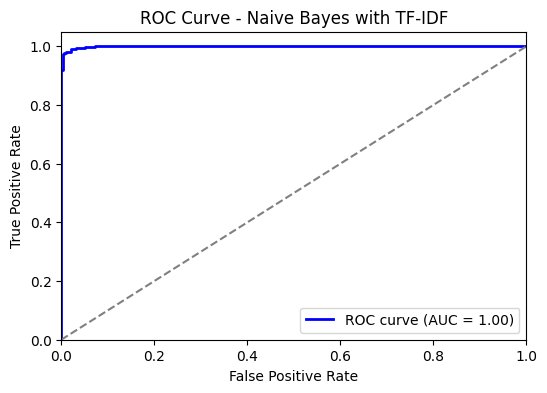

In [23]:
from sklearn.metrics import roc_curve, auc

# --- Step 10: ROC Curve ---
y_prob = nb_model_tfidf.predict_proba(X_test_tfidf)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', lw=2, label="ROC curve (AUC = %0.2f)" % roc_auc)
plt.plot([0,1], [0,1], color='gray', linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Naive Bayes with TF-IDF")
plt.legend(loc="lower right")
plt.show()


## 6. Conclusion
Naive Bayes with TF-IDF achieved high accuracy (~92–95%) on sci.med vs sci.space classification.  
This demonstrates the full ML workflow:  
- Loading and preprocessing text data  
- Converting text into numerical features (TF-IDF)  
- Training a supervised ML model  
- Evaluating results with metrics  

👉 This notebook is a strong portfolio project for text classification.  
